In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
X_data = np.arange(100, step=.1)
y_data = X_data + 20 * np.sin(X_data/10)

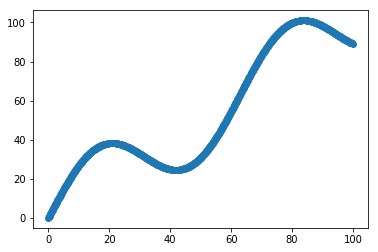

In [3]:
plt.scatter(X_data, y_data)
plt.show()

In [4]:
n_samples = 1000
batch_size = 100

In [5]:
X_data = np.reshape(X_data, (n_samples, 1))
y_data = np.reshape(y_data, (n_samples, 1))

In [6]:
X = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1))

In [7]:
with tf.variable_scope("linear_regression"):
    W = tf.get_variable("weights", (1, 1),initializer=tf.random_normal_initializer())
    b = tf.get_variable("bias", (1,),initializer=tf.constant_initializer(0.0))
    y_pred = tf.matmul(X, W) + b
    loss = tf.reduce_sum((y - y_pred)**2/n_samples)

In [8]:
opt_operation = tf.train.AdamOptimizer().minimize(loss)

with tf.Session() as sess:
    # Initialize variables in graph
    sess.run(tf.initialize_all_variables())
    # Gradient descent loop for 500 steps
    for _ in range(500):
        # Select random minibatch
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        # Do gradient descent step
        _, loss_val = sess.run([opt_operation, loss], feed_dict={X: X_batch, y: y_batch})
        y_pred2 = sess.run([y_pred], feed_dict={X: X_batch})

Instructions for updating:
Use `tf.global_variables_initializer` instead.


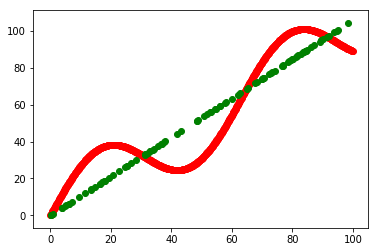

In [9]:
plt.scatter(X_data, y_data, color="red")
plt.scatter(X_batch, y_pred2[0], color="green")
plt.show()